In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install anvil-uplink

     |████████████████████████████████| 64 kB 2.3 MB/s 
     |████████████████████████████████| 51 kB 186 kB/s 
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45229 sha256=b68b43923a3a13eb96adb4edc07322e1e60cb65bad5207a05bf4149c61137e85
  Stored in directory: /root/.cache/pip/wheels/29/ea/7d/3410aa0aa0e4402ead9a7a97ab2214804887e0f5c2b76f0c96
Successfully built ws4py


In [ ]:
uplink_key = "server_ADKLTUCFGN3IHEVSRW6P3KPZ-KU6UZX5W6LMFGNKI"

In [ ]:
import anvil.server

anvil.server.connect(uplink_key)

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Published" as SERVER


In [ ]:
!pip install text2emotion

     |████████████████████████████████| 57 kB 4.3 MB/s 
     |████████████████████████████████| 175 kB 19.4 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=9d3f596a5ce1c6553f18f3de878373e9abdbae4de18c38ea23b048fe322f2d84
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [ ]:
from pydoc import doc
import re 
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import text2emotion as te

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
import random

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# pip install tensorflow keras pickle nltk
from google.colab import drive
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
# from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD
import random
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle
intents_file = open('/content/drive/MyDrive/Colab Notebooks/intents.json').read()
intents = json.loads(intents_file)

In [ ]:
import nltk
nltk.download('punkt')
words=[]
classes = []
documents = []
ignore_letters = ['!', '?', ',', '.']
for intent in intents['intents']:
    for pattern in intent['patterns']:
        #tokenize each word
        word = nltk.word_tokenize(pattern)
        words.extend(word)
        #add documents in the corpus
        documents.append((word, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])
print(documents)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[(['hi'], 'greeting'), (['hello'], 'greeting'), (['hai'], 'greeting'), (['helloo'], 'greeting'), (['hlo'], 'greeting'), (['hloii'], 'greeting'), (['whats', 'up'], 'greeting'), (['sup'], 'greeting'), (['is', 'anyone', 'there'], 'greeting'), (['hey'], 'greeting'), (['bye'], 'goodbye'), (['cya'], 'goodbye'), (['see', 'you', 'later'], 'goodbye'), (['goodbye'], 'goodbye'), (['im', 'leaving'], 'goodbye'), (['have', 'a', 'good', 'day'], 'goodbye'), (['how', 'old', 'are', 'you'], 'age'), (['what', 'is', 'your', 'age'], 'age'), (['thanks'], 'thanks'), (['thank', 'you'], 'thanks'), (['thankyou'], 'thanks'), (['ty'], 'thanks'), (['I', 'owe', 'you', 'one'], 'thanks'), (['whats', 'is', 'your', 'name'], 'name'), (['whats', 'your', 'name'], 'name'), (['whats', 'should', 'I', 'call', 'you'], 'name'), (['how', 'should', 'I', 'address', 'you'], 'name'), (['Yes', 'it', 'does'], 'sky_net_yes'), (

In [ ]:
import nltk
nltk.download('wordnet')
# create the training data
training = []
# create empty array for the output
output_empty = [0] * len(classes)
# training set, bag of words for every sentence
for doc in documents:
    # initializing bag of words

    bag = []
    # list of tokenized words for the pattern
    word_patterns = doc[0]
    # lemmatize each word - create base word, in attempt to represent related words
    word_patterns = [lemmatizer.lemmatize(word.lower()) for word in word_patterns]
    # create the bag of words array with 1, if word is found in current pattern
    for word in words:
        bag.append(1) if word in word_patterns else bag.append(0)
    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1 #
    training.append([bag, output_row])
# shuffle the features and make numpy array
random.shuffle(training)
training = np.array(training)
# create training and testing lists. X - patterns, Y - intents
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Training data is created")
#print(train_x)
#print(train_y)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Training data is created


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
# deep neural networds model KERAS
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))
# Compiling model. SGD with Nesterov accelerated gradient gives good results for this model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) #optimizer 
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
#Training and saving the model 
hist = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)
model.save('chatbot_model.h5', hist)
print("model is created")

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/200
35/35 [==============================] - 1s 3ms/step - loss: 3.4289 - accuracy: 0.0988
Epoch 2/200
35/35 [==============================] - 0s 2ms/step - loss: 3.2703 - accuracy: 0.1744
Epoch 3/200
35/35 [==============================] - 0s 2ms/step - loss: 3.0960 - accuracy: 0.2151
Epoch 4/200
35/35 [==============================] - 0s 2ms/step - loss: 2.9237 - accuracy: 0.2267
Epoch 5/200
35/35 [==============================] - 0s 2ms/step - loss: 2.7718 - accuracy: 0.2907
Epoch 6/200
35/35 [==============================] - 0s 3ms/step - loss: 2.5996 - accuracy: 0.3023
Epoch 7/200
35/35 [==============================] - 0s 2ms/step - loss: 2.5338 - accuracy: 0.3140
Epoch 8/200
35/35 [==============================] - 0s 2ms/step - loss: 2.4610 - accuracy: 0.3314
Epoch 9/200
35/35 [==============================] - 0s 2ms/step - loss: 2.3381 - accuracy: 0.3605
Epoch 10/200
35/35 [==============================] - 0s 2ms/step - loss: 2.2998 - accuracy: 0.3430
Epoch 11/

In [ ]:
 model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               50432     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 31)                2015      
                                                                 
Total params: 60,703
Trainable params: 60,703
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf

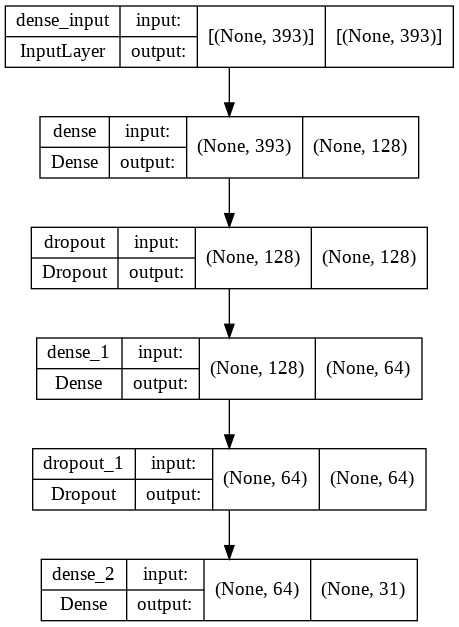

In [ ]:
tf.keras.utils.plot_model(model,to_file='simple.png',show_shapes=True)

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import pickle
import numpy as np
from keras.models import load_model
model = load_model('chatbot_model.h5')
import json
import random
intents = json.loads(open('/content/drive/MyDrive/Colab Notebooks/intents.json').read())
words = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/words.pkl','rb'))
classes = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/classes.pkl','rb'))
def clean_up_sentence(sentence):
    # tokenize the pattern - splitting words into array
    sentence_words = nltk.word_tokenize(sentence)
    # stemming every word - reducing to base form
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words
# return bag of words array: 0 or 1 for words that exist in sentence
def bag_of_words(sentence, words, show_details=True):
    # tokenizing patterns
    sentence_words = clean_up_sentence(sentence)
    # bag of words - vocabulary matrix
    bag = [0]*len(words)  
    for s in sentence_words:
        for i,word in enumerate(words):
            if word == s: 
                # assign 1 if current word is in the vocabulary position
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % word)
    return(np.array(bag))
def predict_class(sentence):
    # filter below  threshold predictions
    p = bag_of_words(sentence, words,show_details=False)
    res = model.predict(np.array([p]))[0]
    ERROR_THRESHOLD = 0.25
    results = [[i,r] for i,r in enumerate(res) if r>ERROR_THRESHOLD]
    # sorting strength probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    return return_list
def getResponse(ints, intents_json):
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if(i['tag']== tag):
            result = random.choice(i['responses'])
            break
    return result
#Creating tkinter GUI
# import tkinter
# from tkinter import *
# def send():
#     msg = EntryBox.get("1.0",'end-1c').strip()
#     EntryBox.delete("0.0",END)
#     if msg != '':
#         ChatBox.config(state=NORMAL)
#         ChatBox.insert(END, "You: " + msg + '\n\n')
#         ChatBox.config(foreground="#446665", font=("Verdana", 12 )) 
#         ints = predict_class(msg)
#         res = getResponse(ints, intents)
#         ChatBox.insert(END, "Bot: " + res + '\n\n')           
#         ChatBox.config(state=DISABLED)
#         ChatBox.yview(END)
# root = Tk()
# root.title("Chatbot")
# root.geometry("400x500")
# root.resizable(width=FALSE, height=FALSE)
# #Create Chat window
# ChatBox = Text(root, bd=0, bg="white", height="8", width="50", font="Arial",)
# ChatBox.config(state=DISABLED)
# #Bind scrollbar to Chat window
# scrollbar = Scrollbar(root, command=ChatBox.yview, cursor="heart")
# ChatBox['yscrollcommand'] = scrollbar.set
# #Create Button to send message
# SendButton = Button(root, font=("Verdana",12,'bold'), text="Send", width="12", height=5,
#                     bd=0, bg="#f9a602", activebackground="#3c9d9b",fg='#000000',
#                     command= send )
# #Create the box to enter message
# EntryBox = Text(root, bd=0, bg="white",width="29", height="5", font="Arial")
# #EntryBox.bind("<Return>", send)
# #Place all components on the screen
# scrollbar.place(x=376,y=6, height=386)
# ChatBox.place(x=6,y=6, height=386, width=370)
# EntryBox.place(x=128, y=401, height=90, width=265)
# SendButton.place(x=6, y=401, height=90)
# root.mainloop()

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
# from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD
import random

import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle

words=[]
classes = []
documents = []
ignore_letters = ['!', '?', ',', '.']
intents_file = open('/content/drive/MyDrive/Colab Notebooks/intents.json').read()
intents = json.loads(intents_file)

for intent in intents['intents']:
    for pattern in intent['patterns']:
        #tokenize each word
        word = nltk.word_tokenize(pattern)
        words.extend(word)
        #add documents in the corpus
        documents.append((word, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])
print(documents)
# lemmaztize and lower each word and remove duplicates
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_letters]
words = sorted(list(set(words)))
# sort classes
classes = sorted(list(set(classes)))
# documents = combination between patterns and intents
print (len(documents), "documents")
# classes = intents
print (len(classes), "classes", classes)
# words = all words, vocabulary
print (len(words), "unique lemmatized words", words)

pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))

# create our training data
training = []
# create an empty array for our output
output_empty = [0] * len(classes)
# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # lemmatize each word - create base word, in attempt to represent related words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # create our bag of words array with 1, if word match found in current pattern
    for word in words:
        bag.append(1) if word in pattern_words else bag.append(0)
        
    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    
    training.append([bag, output_row])
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)
# create train and test lists. X - patterns, Y - intents
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Training data created")

# Create model - 3 layers. First layer 128 neurons, second layer 64 neurons and 3rd output layer contains number of neurons
# equal to number of intents to predict output intent with softmax
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#fitting and saving the model 
hist = model.fit(np.array(train_x), np.array(train_y), epochs=172, batch_size=5, verbose=1)
model.save('chatbot_model.h5', hist)

print("model created")

[(['hi'], 'greeting'), (['hello'], 'greeting'), (['hai'], 'greeting'), (['helloo'], 'greeting'), (['hlo'], 'greeting'), (['hloii'], 'greeting'), (['whats', 'up'], 'greeting'), (['sup'], 'greeting'), (['is', 'anyone', 'there'], 'greeting'), (['hey'], 'greeting'), (['bye'], 'goodbye'), (['cya'], 'goodbye'), (['see', 'you', 'later'], 'goodbye'), (['goodbye'], 'goodbye'), (['im', 'leaving'], 'goodbye'), (['have', 'a', 'good', 'day'], 'goodbye'), (['how', 'old', 'are', 'you'], 'age'), (['what', 'is', 'your', 'age'], 'age'), (['thanks'], 'thanks'), (['thank', 'you'], 'thanks'), (['thankyou'], 'thanks'), (['ty'], 'thanks'), (['I', 'owe', 'you', 'one'], 'thanks'), (['whats', 'is', 'your', 'name'], 'name'), (['whats', 'your', 'name'], 'name'), (['whats', 'should', 'I', 'call', 'you'], 'name'), (['how', 'should', 'I', 'address', 'you'], 'name'), (['Yes', 'it', 'does'], 'sky_net_yes'), (['Yeah'], 'sky_net_yes'), (['Haha', 'yep'], 'sky_net_yes'), (['yes'], 'sky_net_yes'), (['Indeed'], 'sky_net_yes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


35/35 [==============================] - 1s 2ms/step - loss: 3.4296 - accuracy: 0.0640
Epoch 2/172
35/35 [==============================] - 0s 2ms/step - loss: 3.3193 - accuracy: 0.1628
Epoch 3/172
35/35 [==============================] - 0s 2ms/step - loss: 3.2258 - accuracy: 0.1453
Epoch 4/172
35/35 [==============================] - 0s 2ms/step - loss: 3.1379 - accuracy: 0.1570
Epoch 5/172
35/35 [==============================] - 0s 2ms/step - loss: 3.0834 - accuracy: 0.1744
Epoch 6/172
35/35 [==============================] - 0s 2ms/step - loss: 2.9909 - accuracy: 0.1860
Epoch 7/172
35/35 [==============================] - 0s 2ms/step - loss: 2.8844 - accuracy: 0.2035
Epoch 8/172
35/35 [==============================] - 0s 1ms/step - loss: 2.7354 - accuracy: 0.2267
Epoch 9/172
35/35 [==============================] - 0s 2ms/step - loss: 2.7042 - accuracy: 0.2558
Epoch 10/172
35/35 [==============================] - 0s 1ms/step - loss: 2.5654 - accuracy: 0.3140
Epoch 11/172
35/35 [=

In [ ]:
import anvil.server

In [ ]:
anvil.server.connect(uplink_key)

In [ ]:
msg = list()
text = str()

In [ ]:
@anvil.server.callable
def responsed(msg1):
    #print("response")
    msg.append(msg1)
    ints = predict_class(msg1)
    res = getResponse(ints, intents)
    return res

In [ ]:
# # IBM Tone analyzer
# import json
# from ibm_watson import ToneAnalyzerV3
# from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

# authenticator = IAMAuthenticator(api_key)
# tone_analyzer = ToneAnalyzerV3(
#     version='2017-09-21',
#     authenticator=authenticator
# )

# tone_analyzer.set_service_url(https://api.eu-gb.tone-analyzer.watson.cloud.ibm.com/instances/api_key)
# text = " "
# for i in msg:
#     text = text+i
# tone_analysis = tone_analyzer.tone(
#     {'text': text},
#     content_type='application/json'
# ).get_result()
# print(json.dumps(tone_analysis, indent=2))

In [ ]:
api_key="d750a0e2d5cc68b782de3c02c4100616"

In [ ]:
@anvil.server.callable
def song_emotion():
    #authenticator = IAMAuthenticator(api_key)
   # tone_analyzer = ToneAnalyzerV3(
     #   version='2017-09-21',
     #   authenticator=authenticator
    
    #)

    #tone_analyzer.set_service_url(https://api.eu-gb.tone-analyzer.watson.cloud.ibm.com/instances/api_key)
    # text = ""
    # for i in msg:
    #     text = text+i
    len1 = len(msg)    
    textData = msg[len1-5]+". "+msg[len1-4]+". "+msg[len1-3]+". "+msg[len1-2]+". "+msg[len1-1]
    data=te.get_emotion(textData)
    emotion=max(data,key=data.get)
   # print("Data Emotion:"+emotion)

    emoji_dict = {"joy":"Happy", "fear":"Fear", "anger":"Angry", "sadness":"Sad", "disgust":"Disgust", "shame":"Shame", "guilt":"Guilt"}
    texts = [textData]
    emotion_counter={"joy":0, "fear":0, "anger":0, "sadness":0, "disgust":0, "shame":0, "guilt":0}
    for text in msg: 
        features = create_feature(text, nrange=(1, 4))
        features = vectorizer.transform(features)
        prediction = clf.predict(features)[0]
        #print(text,emoji_dict[prediction])
        emotion_=emoji_dict[prediction]
        if emotion_.lower()=="Happy".lower():
            emotion_counter["joy"]=emotion_counter["joy"]+1
        elif emotion_.lower()=="Fear".lower():
            emotion_counter["fear"]=emotion_counter["fear"]+1
        elif emotion_.lower()=="Angry".lower():
            emotion_counter["anger"]=emotion_counter["anger"]+1
        elif emotion_.lower()=="Sad".lower():
            emotion_counter["sadness"]=emotion_counter["sadness"]+1
        elif emotion_.lower()=="Disgist".lower():
            emotion_counter["disgust"]=emotion_counter["disgust"]+1
        elif emotion_.lower()=="Shame".lower():
            emotion_counter["shame"]=emotion_counter["shame"]+1
        elif emotion_.lower()=="Guilt".lower():
            emotion_counter["guilt"]=emotion_counter["guilt"]+1

    #print(emotion_counter)
    emotion_print=max(emotion_counter,key=emotion_counter.get)
    print(emotion)
    dic1 = dict()
    dic1['emotion'] = emotion
    import requests

    url=f"http://ws.audioscrobbler.com/2.0/?method=tag.gettoptracks&tag={emotion}&api_key={api_key}&format=json&limit=10"
    response = requests.get(url)
    payload = response.json()
    for i in range(10):
        r=payload['tracks']['track'][i]
        dic1[r['name']] = r['url']
    return dic1

In [ ]:
def read_data(file):
    data = []
    with open('/content/drive/MyDrive/Colab Notebooks/text.txt', 'r')as f:
        for line in f:
            line = line.strip()
            label = ' '.join(line[1:line.find("]")].strip().split())
            text = line[line.find("]")+1:].strip()
            data.append([label, text])
    return data

In [ ]:
file = open('/content/drive/MyDrive/Colab Notebooks/text.txt')
data = read_data(file)
print("Number of instances: {}".format(len(data)))

Number of instances: 7480


In [ ]:
def ngram(token, n): 
    output = []
    for i in range(n-1, len(token)): 
        ngram = ' '.join(token[i-n+1:i+1])
        output.append(ngram) 
    return output

In [ ]:
def create_feature(text, nrange=(1, 1)):
    text_features = [] 
    text = text.lower() 
    text_alphanum = re.sub('[^a-z0-9#]', ' ', text)
    for n in range(nrange[0], nrange[1]+1): 
        text_features += ngram(text_alphanum.split(), n)    
    text_punc = re.sub('[a-z0-9]', ' ', text)
    text_features += ngram(text_punc.split(), 1)
    return Counter(text_features)

In [ ]:
def convert_label(item, name): 
    items = list(map(float, item.split()))
    label = ""
    for idx in range(len(items)): 
        if items[idx] == 1: 
            label += name[idx] + " "
    
    return label.strip()

In [ ]:
emotions = ["joy", 'fear', "anger", "sadness", "disgust", "shame", "guilt"]

In [ ]:
X_all = []
y_all = []
for label, text in data:
    y_all.append(convert_label(label, emotions))
    X_all.append(create_feature(text, nrange=(1, 4)))

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.2, random_state = 123)

NameError: ignored

In [ ]:

def train_test(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    return train_acc, test_acc

In [ ]:
from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer(sparse = True)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
svc = SVC()
rforest = RandomForestClassifier(random_state=123)

In [ ]:
clifs = [svc]

# train and test them 
print("| {:25} | {} | {} |".format("Classifier", "Training Accuracy", "Test Accuracy"))
print("| {} | {} | {} |".format("-"*25, "-"*17, "-"*13))
for clf in clifs: 
    clf_name = clf.__class__.__name__
    train_acc, test_acc = train_test(clf, X_train, X_test, y_train, y_test)
    print("| {:25} | {:17.7f} | {:13.7f} |".format(clf_name, train_acc, test_acc))

l = ["joy", 'fear', "anger", "sadness", "disgust", "shame", "guilt"]
l.sort()
label_freq = {}
for label, _ in data: 
    label_freq[label] = label_freq.get(label, 0) + 1

# print the labels and their counts in sorted order 
for l in sorted(label_freq, key=label_freq.get, reverse=True):
    print("{:10}({})  {}".format(convert_label(l, emotions), l, label_freq[l]))



| Classifier                | Training Accuracy | Test Accuracy |
| ------------------------- | ----------------- | ------------- |
| SVC                       |         0.9067513 |     0.4512032 |
joy       (1. 0. 0. 0. 0. 0. 0.)  1084
anger     (0. 0. 1. 0. 0. 0. 0.)  1080
sadness   (0. 0. 0. 1. 0. 0. 0.)  1079
fear      (0. 1. 0. 0. 0. 0. 0.)  1078
disgust   (0. 0. 0. 0. 1. 0. 0.)  1057
guilt     (0. 0. 0. 0. 0. 0. 1.)  1057
shame     (0. 0. 0. 0. 0. 1. 0.)  1045


In [ ]:
UserRp="yes"
while UserRp.lower()=="yes":
    print("Chatbot : Hey there, Wassup ?")
    # responded function takes text of user and returns chatbot output
    for i in range(0,5):
        m = input("User : ")
        res = responsed(m)
        print("Chatbot : "+res)
    ans = song_emotion()
    print("Emotion : "+ans['emotion'])
    UserRp = input("Chat Again Yes / No : ")

Chatbot : Hey there, Wassup ?
User : hello
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


ValueError: ignored

In [ ]:
# print(msg)
# # print(text)
# print(len(msg))

In [ ]:
# SONG RECOMMENDATION

In [ ]:
import requests

url=f"http://ws.audioscrobbler.com/2.0/?method=tag.gettoptracks&tag=happy&api_key={api_key}&format=json&limit=5"
response = requests.get(url)
payload = response.json()
# for i in range(4):
r=payload['tracks']['track'][0]
# print(r['url'])
print(payload)

{'tracks': {'track': [{'name': 'Pumped Up Kicks', 'duration': '236', 'mbid': '816b3284-5f24-4f3a-9554-750e0bf5d060', 'url': 'https://www.last.fm/music/Foster+the+People/_/Pumped+Up+Kicks', 'streamable': {'#text': '0', 'fulltrack': '0'}, 'artist': {'name': 'Foster the People', 'mbid': 'e0e1a584-dd0a-4bd1-88d1-c4c62895039d', 'url': 'https://www.last.fm/music/Foster+the+People'}, 'image': [{'#text': 'https://lastfm.freetls.fastly.net/i/u/34s/2a96cbd8b46e442fc41c2b86b821562f.png', 'size': 'small'}, {'#text': 'https://lastfm.freetls.fastly.net/i/u/64s/2a96cbd8b46e442fc41c2b86b821562f.png', 'size': 'medium'}, {'#text': 'https://lastfm.freetls.fastly.net/i/u/174s/2a96cbd8b46e442fc41c2b86b821562f.png', 'size': 'large'}, {'#text': 'https://lastfm.freetls.fastly.net/i/u/300x300/2a96cbd8b46e442fc41c2b86b821562f.png', 'size': 'extralarge'}], '@attr': {'rank': '1'}}, {'name': "I'm Yours", 'duration': '242', 'mbid': 'a5a2330e-2fff-4601-a715-6e68a8e98fbf', 'url': 'https://www.last.fm/music/Jason+Mraz

In [ ]:
# print(dic1)

In [ ]:
# song_emotion function would return dictionary consisting of emotion and recommended songs
ans = song_emotion()
print("Emotion : "+ans['emotion'])
ans.pop('emotion')
lst = list(ans.keys())
print("Song Recommendations : ")
for i in range(10):
    print("Song_name : "+lst[i])
    print("Song_URL : "+ans[lst[i]])


Happy
Emotion : Happy
Song Recommendations : 
Song_name : Pumped Up Kicks
Song_URL : https://www.last.fm/music/Foster+the+People/_/Pumped+Up+Kicks
Song_name : I'm Yours
Song_URL : https://www.last.fm/music/Jason+Mraz/_/I%27m+Yours
Song_name : Dog Days Are Over
Song_URL : https://www.last.fm/music/Florence+%252B+the+Machine/_/Dog+Days+Are+Over
Song_name : A-Punk
Song_URL : https://www.last.fm/music/Vampire+Weekend/_/A-Punk
Song_name : Friday I'm in Love
Song_URL : https://www.last.fm/music/The+Cure/_/Friday+I%27m+in+Love
Song_name : Float On
Song_URL : https://www.last.fm/music/Modest+Mouse/_/Float+On
Song_name : Island in the Sun
Song_URL : https://www.last.fm/music/Weezer/_/Island+in+the+Sun
Song_name : Hey Ya!
Song_URL : https://www.last.fm/music/OutKast/_/Hey+Ya%21
Song_name : Don't Stop Me Now
Song_URL : https://www.last.fm/music/Queen/_/Don%27t+Stop+Me+Now
Song_name : Young Folks
Song_URL : https://www.last.fm/music/Peter+Bjorn+and+John/_/Young+Folks
